### 1. 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---------------

### 2. 데이터 불러오기

In [2]:
# 건물정보 데이터셋
building = pd.read_csv('data/building_info.csv')

# 날씨/전력사용량 데이터셋 (건물/시간대별)
train = pd.read_csv('data/train.csv')

# 날씨/전력사용량 데이터셋 (건물/시간대별)
test = pd.read_csv('data/test.csv')

In [4]:
# 한글폰트 사용: 'NanumGothic' 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결

---------------

### 3-1. 결측치 시각화

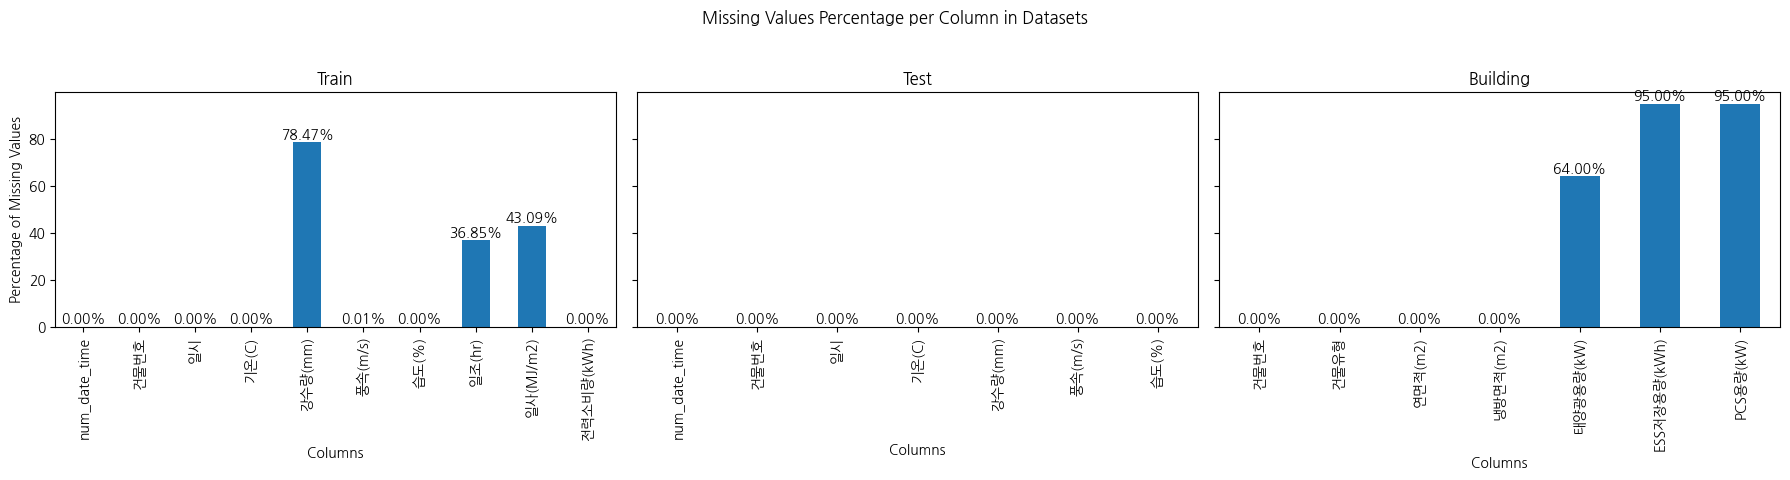

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# '-'를 결측치로 변환하고, 결측치 비율을 계산하는 함수
def calculate_missing_values(df):
    df.replace('-', pd.NA, inplace=True)
    return df.isnull().mean() * 100

# 각 데이터프레임에 함수 적용
datasets = {'Train': train, 'Test': test, 'Building': building}
missing_data = {name: calculate_missing_values(df) for name, df in datasets.items()}

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # 서브플롯들 공유 Y 축 설정
fig.suptitle('Missing Values Percentage per Column in Datasets')

for ax, (title, data) in zip(axes, missing_data.items()):
    bars = data.plot.bar(ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Percentage of Missing Values')
    ax.set_xlabel('Columns')
    
    # 각 막대 위에 값 추가
    for p in bars.patches:
        ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 상위 제목이 잘리지 않도록 조정
plt.show()

### 3-2. 결측치가 있는 컬럼 추출하기

In [6]:
# 각 데이터셋에서 결측치가 포함된 컬럼 목록을 반환하는 함수
def find_columns_with_missing_values(df):
    missing_columns = df.columns[df.isnull().any()].tolist()
    return missing_columns

# train, test, building 데이터셋에서 결측치가 있는 컬럼 추출
missing_columns_train = find_columns_with_missing_values(train)
missing_columns_test = find_columns_with_missing_values(test)
missing_columns_building = find_columns_with_missing_values(building)

# 출력
print("Train 데이터 결측치 컬럼:", missing_columns_train)
print("Test 데이터 결측치 컬럼:", missing_columns_test)
print("Building 데이터 결측치 컬럼:", missing_columns_building)

Train 데이터 결측치 컬럼: ['강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)']
Test 데이터 결측치 컬럼: []
Building 데이터 결측치 컬럼: ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']


### 3-3. 값이 0인 행 출력하기

In [7]:
# 데이터셋에서 값이 0인 셀을 포함하는 행을 찾는 코드
def find_rows_with_any_zeros(df):
    zero_rows = df[(df == 0).any(axis=1)]
    return zero_rows

# train, test, building 데이터셋에서 값이 0인 셀을 포함하는 행 추출
rows_with_zeros_train = find_rows_with_any_zeros(train)
rows_with_zeros_test = find_rows_with_any_zeros(test)
rows_with_zeros_building = find_rows_with_any_zeros(building)

In [8]:
# building 데이터에서 값이 0인 행 출력하기
rows_with_zeros_building

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
64,65,아파트,183839.000,0.0,<NA>,<NA>,<NA>
65,66,아파트,105073.000,0.0,<NA>,<NA>,<NA>
67,68,아파트,389395.928,0.0,<NA>,<NA>,<NA>


In [9]:
# train 데이터에서 값이 0인 행 출력하기
rows_with_zeros_train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
6,1_20220601 06,1,20220601 06,16.3,NaN,1.0,50.0,0.0,0.05,1314.72
30,1_20220602 06,1,20220602 06,17.8,NaN,2.4,80.0,0.0,0.04,1390.08
31,1_20220602 07,1,20220602 07,18.4,NaN,2.6,77.0,0.0,0.27,1739.04
54,1_20220603 06,1,20220603 06,19.1,NaN,2.1,79.0,0.0,0.03,1451.04
55,1_20220603 07,1,20220603 07,19.6,NaN,1.7,77.0,0.0,0.34,1863.84
...,...,...,...,...,...,...,...,...,...,...
203989,100_20220824 13,100,20220824 13,24.7,NaN,1.4,75.0,0.0,NaN,1096.80
203990,100_20220824 14,100,20220824 14,24.9,NaN,1.2,76.0,0.0,NaN,1092.00
203991,100_20220824 15,100,20220824 15,25.1,NaN,1.2,74.0,0.0,NaN,1120.32
203992,100_20220824 16,100,20220824 16,25.6,NaN,1.4,72.0,0.0,NaN,1137.60


### 3-4. 결측치 처리 코드

In [7]:
# building 데이터셋에서 결측치가 많은 컬럼 삭제
building.drop(columns=['ESS저장용량(kWh)', 'PCS용량(kW)'], axis=1, inplace=True)
train.drop(columns=['num_date_time', '강수량(mm)', '일조(hr)', '일사(MJ/m2)'], axis=1, inplace=True)
test.drop(columns=['num_date_time', '강수량(mm)'], axis=1, inplace=True)

# 결측치르 0값으로 처리
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)
building.fillna(0, inplace=True)

### 3-5. Train, Test 데이터 병합

In [8]:
# train,test 데이터셋을 building 데이터와 병합
train = pd.merge(building, train, on = '건물번호')
test = pd.merge(building, test, on = '건물번호')

--------------------

### 4-1. 태양광용량 시각화

In [10]:
# 태양광용량 전처리
train['태양광용량(kW)'] = train['태양광용량(kW)'].apply(lambda x : 1 if x != 0 else x)
train['태양광용량(kW)'] = train['태양광용량(kW)'].astype('int')
test['태양광용량(kW)'] = test['태양광용량(kW)'].apply(lambda x : 1 if x != 0 else x)
test['태양광용량(kW)'] = test['태양광용량(kW)'].astype('int')

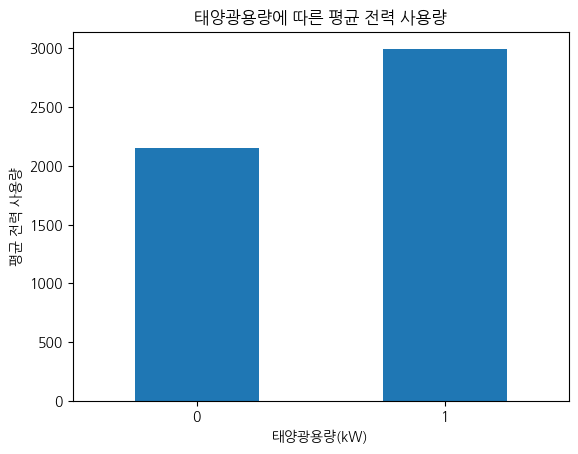

In [11]:
# 태양광용량 시각화
train.groupby('태양광용량(kW)')['전력소비량(kWh)'].mean().plot(kind='bar')
plt.xlabel('태양광용량(kW)')
plt.ylabel('평균 전력 사용량')
plt.title('태양광용량에 따른 평균 전력 사용량')
plt.xticks(rotation=0)
plt.show()

C:\Users\NT930QCG\AppData\Local\Temp\ipykernel_26308\1733416817.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  building_type_zero_solar = train.groupby('건물유형').apply(lambda x: (x['태양광용량(kW)'] == 0).mean() * 100)  # 백분율로 변환


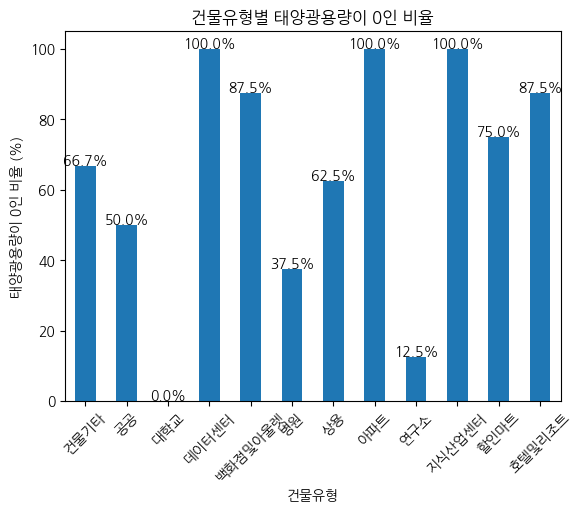

In [22]:
# 건물유형별 태양광용량이 0인 항목의 비율을 계산
building_type_zero_solar = train.groupby('건물유형').apply(lambda x: (x['태양광용량(kW)'] == 0).mean() * 100)  # 백분율로 변환

# 비율을 막대 그래프로 시각화
ax = building_type_zero_solar.plot(kind='bar')
plt.xlabel('건물유형')
plt.ylabel('태양광용량이 0인 비율 (%)')
plt.title('건물유형별 태양광용량이 0인 비율')
plt.xticks(rotation=45)  # x축 라벨 회전

# 막대 위에 비율 표시
for i, v in enumerate(building_type_zero_solar):
    ax.text(i, v + 0.5, f"{v:.1f}%", color='black', ha='center')

plt.show()